In [51]:
import os
from pathlib import Path

In [1]:
import pandas as pd
import numpy as np
import finpy_tse as fpy
import mplfinance as mpf

In [31]:
df = fpy.Get_Price_History(stock = 'خاور',
                                 start_date = '1400-1-1',
                                 end_date = '1402-10-5',
                                 ignore_date = False,
                                 adjust_price = True,
                                 show_weekday = False,
                                 double_date = True)
df.reset_index(drop=True,inplace=True)
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market,Adj Open,Adj High,Adj Low,Adj Close,Adj Final
Date,,,,,,,,,,,,,,,,
2021-05-12,5020,5020,5020,5020,5020,3798035,19066135700,107,خاور,ایران خودرو دیزل,پایه زرد,599,599,599,599,599
2021-05-15,4870,5143,4870,4870,4888,27141709,132681271835,1594,خاور,ایران خودرو دیزل,پایه زرد,581,614,581,581,583
2021-05-16,4742,4950,4742,4881,4832,24245852,117154311803,1899,خاور,ایران خودرو دیزل,پایه زرد,566,591,566,583,577
2021-05-17,4900,4945,4688,4688,4751,11941046,56734995036,990,خاور,ایران خودرو دیزل,پایه زرد,585,590,559,559,567
2021-05-18,4630,4692,4609,4609,4612,19179383,88449906503,802,خاور,ایران خودرو دیزل,پایه زرد,553,560,550,550,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-19,3882,3956,3809,3830,3861,69024760,266507573926,3197,خاور,ایران خودرو دیزل,فرابورس,3882,3956,3809,3830,3861
2023-12-20,3811,3905,3802,3823,3860,57046475,220217976287,2870,خاور,ایران خودرو دیزل,فرابورس,3811,3905,3802,3823,3860
2023-12-23,3821,3926,3810,3821,3858,63250310,244001660946,2954,خاور,ایران خودرو دیزل,فرابورس,3821,3926,3810,3821,3858


In [54]:
data_folder = Path("/Telegram Bot/output/")
for file in os.listdir(data_folder):
    with open(data_folder / file, 'rb') as f:
        f.read(3)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\Telegram Bot\\output'

In [26]:
# Formula To Obtain Ichimoku Cloud 
df['Tenkan-sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
df['Kijun-sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2 
df['Senkou_Span_A'] = (df['Tenkan-sen'] + df['Kijun-sen']) / 2 
df['Senkou_Span_B'] = (df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2 
df['Chikou_Span'] = df['Close'].shift(periods=-26) 

a = df[['Tenkan-sen']]
b = df[['Kijun-sen']]
c = df[['Chikou_Span']]
d = df[['Senkou_Span_A']]
e = df[['Senkou_Span_B']]

In [36]:
ic = [
    mpf.make_addplot(a,color='#fcc905',alpha=0.5,label='Tenkan-sen'),
    mpf.make_addplot(b,color='#F83C78',alpha=0.5,label='Kijun-sen'),
    mpf.make_addplot(c,color='#8D8D16',alpha=0.8,label='Chikou_Span'),
    mpf.make_addplot(d,color='#006B3D',alpha=0.8,label='Senkou_Span_A'),
    mpf.make_addplot(e,color='#D3212C',alpha=0.8,label='Senkou_Span_B'),
]

In [37]:
ichimoko_fill_up = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] >= df['Senkou_Span_B'], alpha = 0.5, color = '#a6f7a6')
ichimoko_fill_down = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] < df['Senkou_Span_B'], alpha = 0.5, color = '#FC8EAC')

KeyError: 'Senkou_Span_A'

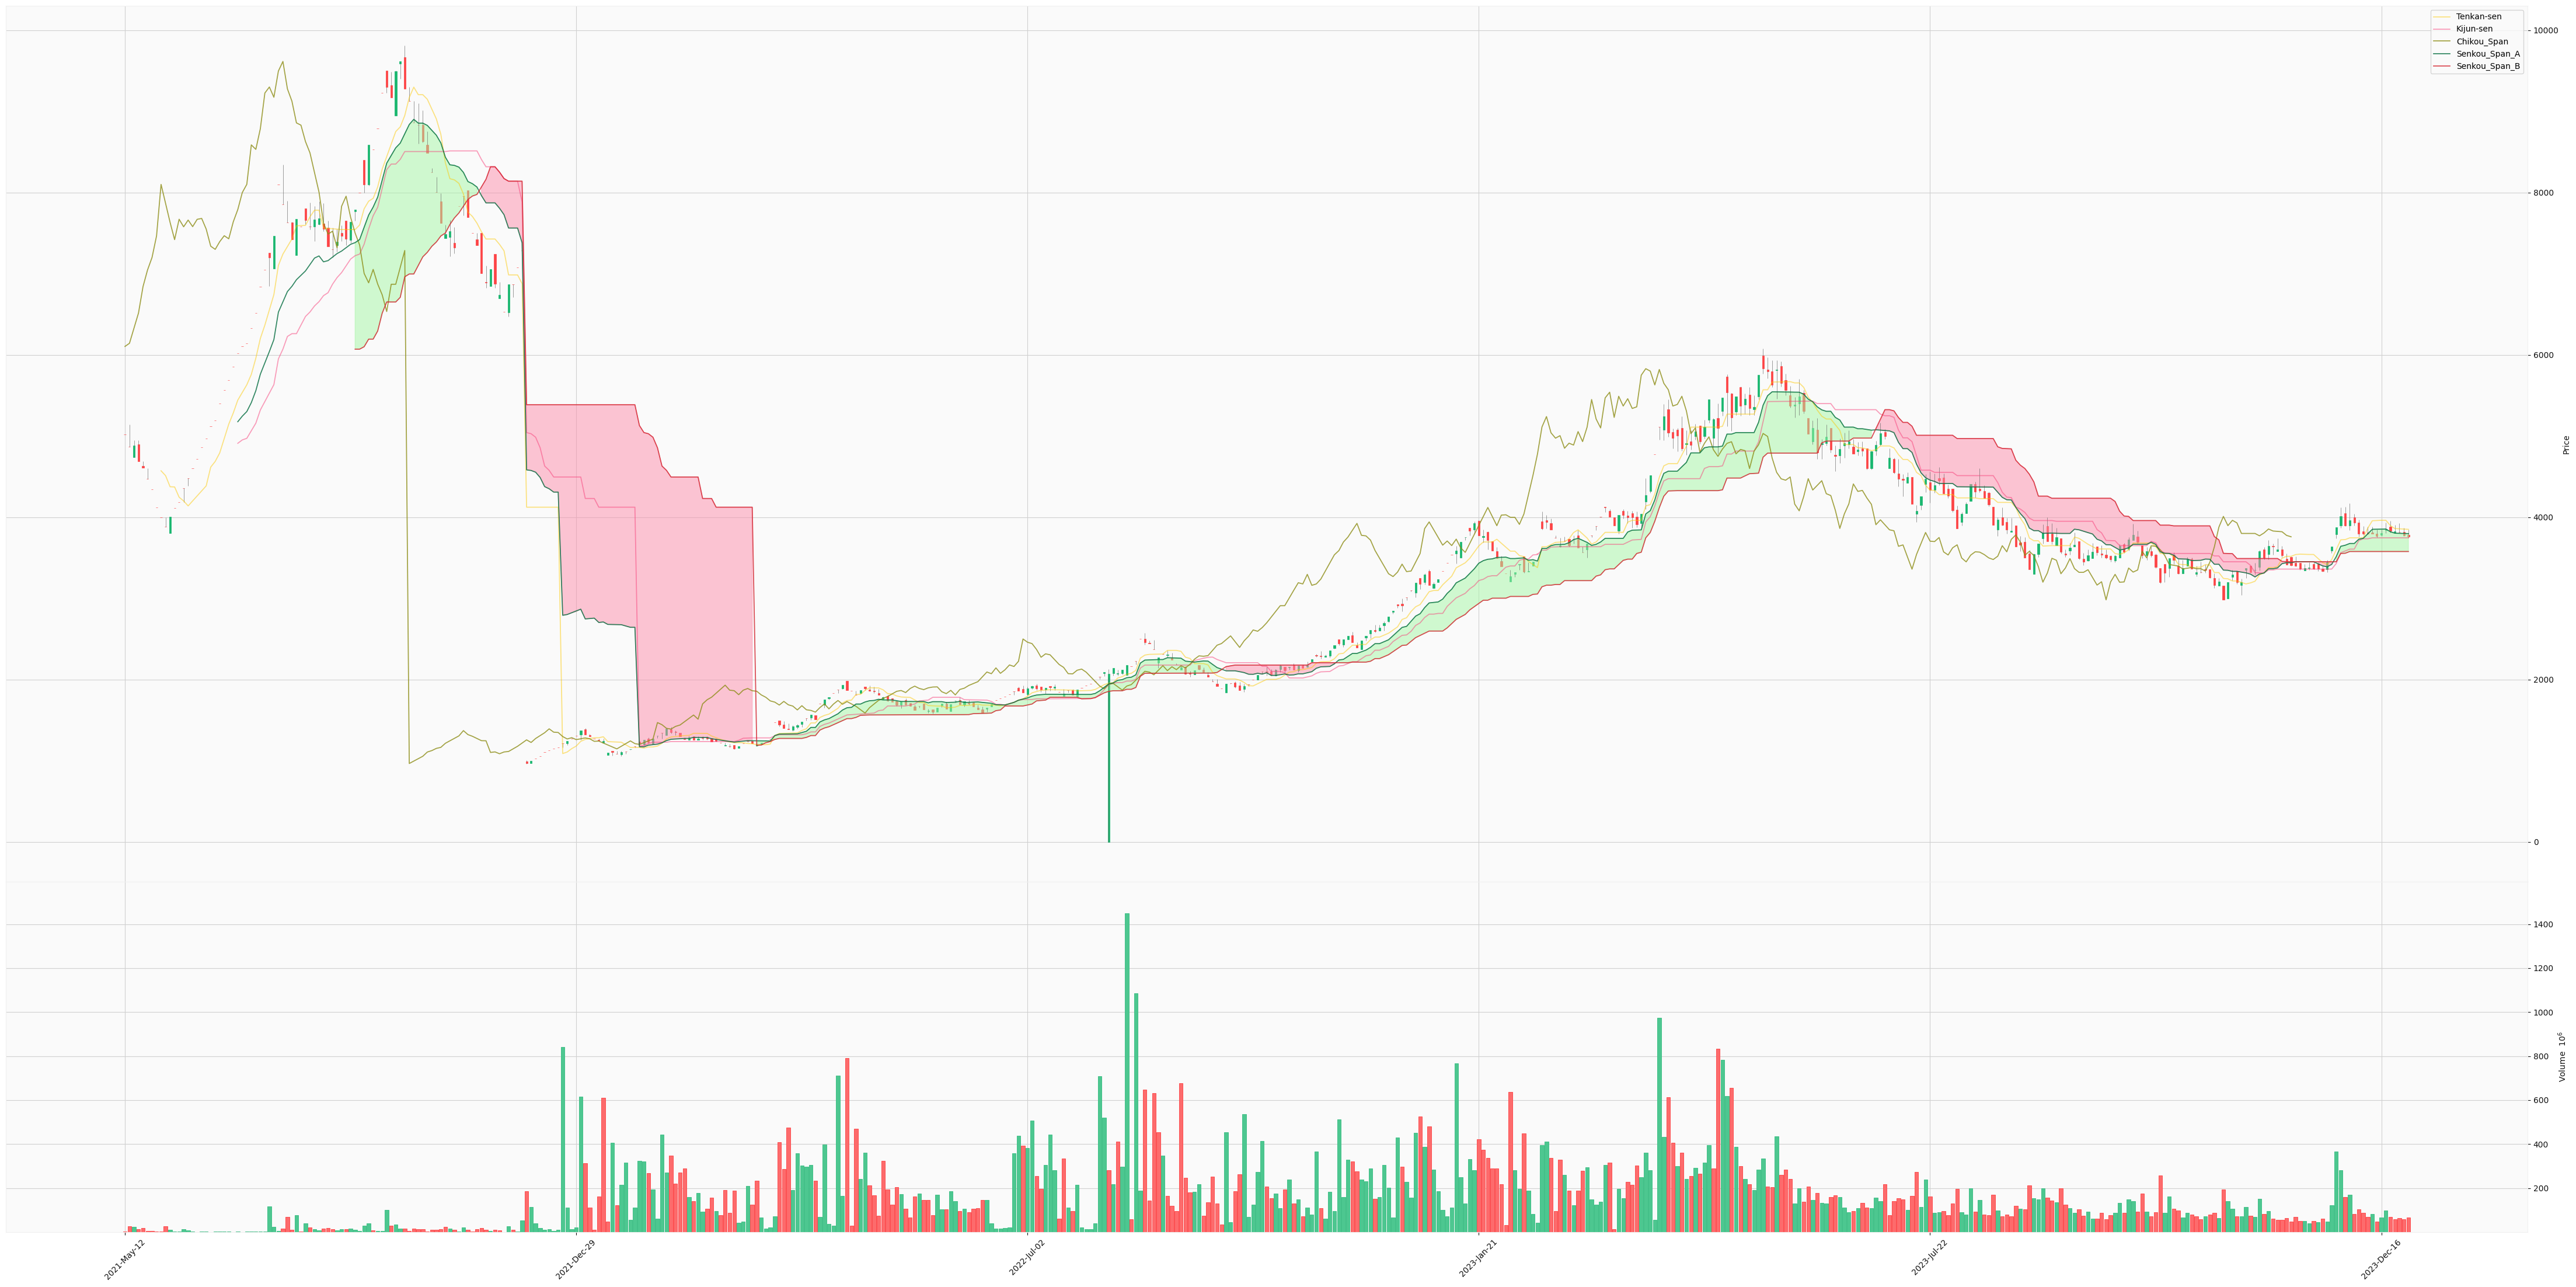

In [45]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    fill_between = [ichimoko_fill_up,ichimoko_fill_down],
    style="yahoo",
    addplot=ic,
    figsize=(60,30),
)